In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

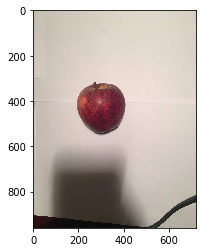

In [140]:
#read image
img = cv2.imread('../photos_images/maca29.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

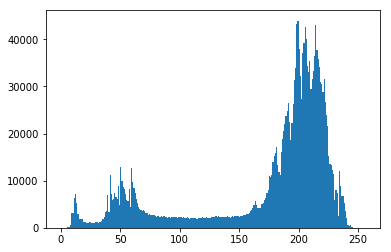

In [141]:
#show histogram to see which treshold we should select
hist = plt.hist(img.ravel(), 256, [0,256])
plt.show(hist)

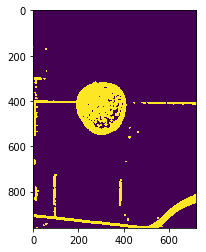

In [169]:
#converting image to graysclae to find threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
thresh = cv2.adaptiveThreshold(gray, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dilated = cv2.dilate(thresh, kernel)
plt.imshow(dilated)

In [159]:
_, cnts, _  = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [160]:
#insert fruit area of original image onto a new image with black background
mask = np.zeros_like(img)

#creating new black image same size as the original
out = np.zeros_like(img)

#selecting all the pixels from mask that are white and replace them with those same 
#pixels from the original image (that correspond to the pixels of the fruit)
out[mask==0] = img[mask==0]

cv2.fillPoly(mask, pts = cnts, color = (255,255,255))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

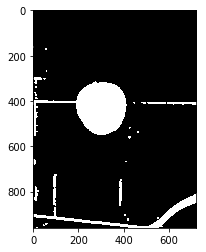

In [161]:
plt.imshow(mask)

In [162]:
# with each contour, draw boundingRect in green
# a minAreaRect in blue
minAreaRect = []
boxes = []

for i,c in enumerate(cnts):
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    
    # get the min area rect
    rect = cv2.minAreaRect(c);
    box = cv2.boxPoints(rect);
    # convert all coordinates floating point values to int
    box = np.int0(box)
    minAreaRect = box
    boxes.append((i,box,w,h))
    # draw a blue 'nghien' rectangle
    cv2.drawContours(mask, [box], 0, (255, 0, 0), 5)

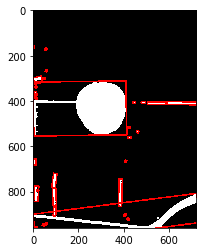

In [163]:
plt.imshow(mask)

6

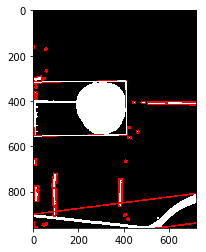

In [164]:
#order all the contours by area from biggest to smallest
boxes.sort(key=lambda x: x[2]*x[3], reverse=True)

#now we want to select the second biggest box (since the biggest one is the contour of the whole image)
minAreaRectangle = boxes[1][1]
minAreaRectangleIndex = boxes[0][0]

#show that this is the contour we want
cv2.drawContours(mask, [minAreaRectangle], 0, (255, 255, 255), 3)
plt.imshow(mask)
minAreaRectangleIndex

In [165]:
#get x and y points and width/height of the countour we selected
x,y,w,h = cv2.boundingRect(cnts[minAreaRectangleIndex])
w,h

(720, 153)